<a href="https://colab.research.google.com/github/Avichay3/Full-training/blob/clustering---exercise/Copy_of_Clustering_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ex1 - Unsupervised learning**

## Names and IDs

1.   List item
2.   List item

## URL for the Colab notebook:


**Introduction**

In this assignment, we will focus on the practical application of unsupervised learning methods, specifically K-means clustering and Principal Component Analysis (PCA). The primary objective is to deepen your understanding of these algorithms and develop proficiency in their implementation using Python and relevant libraries.

**Learning Objectives:**
1.   **Load Local Files**: Implement techniques for
     loading datasets from a local file system into Python.
3.   **Data Visualization**: Apply various visualization techniques to interpret and present your data analysis findings effectively.
4.   **Use Scikit-learn for K-means Clustering**: Use the Scikit-learn library to apply the K-means clustering algorithm.
5.   **Use Scikit-learn PCA**: Utilize PCA from Scikit-learn to perform dimensionality reduction, a critical technique for analyzing high-dimensional data.
6.   **Algoritmic Understendig**: Solve the calculation problem whle using the algorithms learned in class.








**Important Guidelines:**

**Thoroughly Read the Task Before Implementation:** Ensure to understand the entire assignment and its requirements before beginning to code. A comprehensive understanding will aid in a more structured and efficient approach to the tasks.

**Code Reusability and Function Writing:** Focus on writing reusable code and functions. This practice is crucial for maintaining an organized, efficient, and easily debuggable codebase.





















This assignment is designed to enhance both your theoretical understanding and practical skills in key areas of machine learning. Approach each task with diligence and attention to detail.

## Import All Packages
Add all imports needed for this notebook to run

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA



## Prepare Kaggle Load
Navigate to https://www.kaggle.com. Then go to the Account tab of your user profile and under settings find "API" and then click **Create New Token**. This will trigger the download of kaggle.json, a file containing your API credentials.
Then run the cell below and click the upload button to upload kaggle.json to your Colab runtime.

* If you don't use Colab, save the files locally using relative paths.


In [2]:
%%writefile kaggle.json
{
  "username": "avichay123",
  "key": "KGAT_11fdfd653010e9506693bd56d9046006"
}

Writing kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!pip install -q kaggle
!kaggle datasets list

ref                                                             title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
amar5693/screen-time-sleep-and-stress-analysis-dataset          Screen Time, Sleep & Stress Analysis Dataset            787136  2026-02-13 06:56:18.757000           7234        141  1.0              
amar5693/student-performance-dataset                            Student Performance Dataset                             177286  2026-02-12 06:04:44.613000           6276         99  1.0              
aliiihussain/amazon-sales-dataset                               Amazon_Sales_Dataset                                   1297759  2026-02-01 11:37:12.353000           8781        138  1.0              


In [14]:
from google.colab import files

# upload kaggle.json file using user prompt
# uploaded = files.upload()
# for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
# !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

After uploading the kaggle.json select the data to upload (costumers segmentation in this example). The dataset will be copy to the enviroment in the '/content' directory. You will see the 'Retail.xlsx'.
For more about the dataset you can read [here](https://www.kaggle.com/datasets/yasserh/customer-segmentation-dataset/data).

In [5]:
# download the dataset
!kaggle datasets download -d yasserh/customer-segmentation-dataset

# extract the files
!unzip '/content/customer-segmentation-dataset.zip'

Dataset URL: https://www.kaggle.com/datasets/yasserh/customer-segmentation-dataset
License(s): CC0-1.0
  0% 0.00/21.8M [00:00<?, ?B/s]
100% 21.8M/21.8M [00:00<00:00, 1.06GB/s]
Archive:  /content/customer-segmentation-dataset.zip
  inflating: Online Retail.xlsx      


## 1. Visualization (9 points)
In this section, your task is to create and analyze **three** insightful visualizations based on the customer segmentation dataset. The purpose of these visualizations is to uncover underlying patterns and trends in the data that can inform strategic decisions. Your ability to interpret these visualizations will be key in understanding customer behaviors and preferences.

Excel file can be loaded using pandas like this:
`df = pd.read_excel('/content/Online Retail.xlsx')`

*   You will get 2 points for the graph and 1 for the insight.

In [6]:
# load the data
import pandas as pd

# load the Excel file
df = pd.read_excel('/content/Online Retail.xlsx')

# quick inspection
df.shape, df.head()

((541909, 8),
   InvoiceNo StockCode                          Description  Quantity  \
 0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
 1    536365     71053                  WHITE METAL LANTERN         6   
 2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
 3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
 4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
 
           InvoiceDate  UnitPrice  CustomerID         Country  
 0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
 1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
 2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
 3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
 4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  )

In [7]:
import pandas as pd

# show all columns without cutting them
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


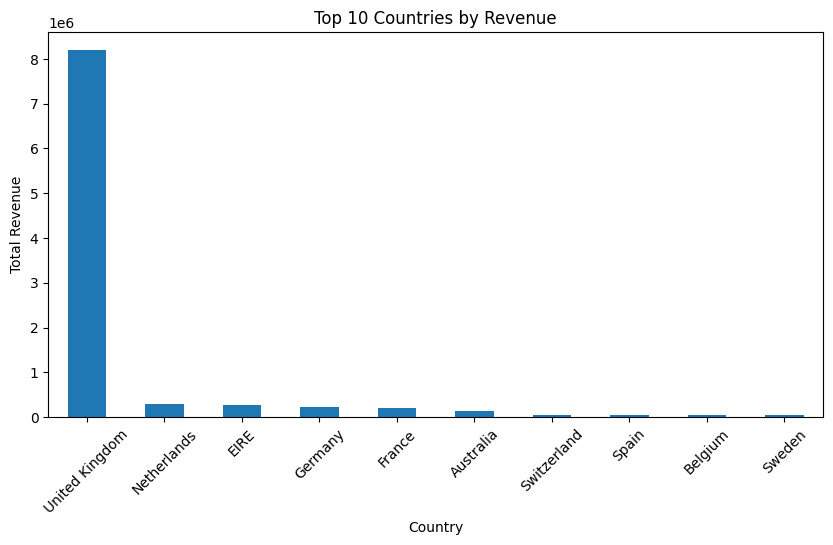

In [8]:
# Graph 1 - Revenue by Country

import matplotlib.pyplot as plt

# create total revenue column
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# aggregate revenue by country
revenue_country = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)

# plot
plt.figure(figsize=(10,5))
revenue_country.plot(kind="bar")
plt.title("Top 10 Countries by Revenue")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

Insight - the revenue distribution reveals a dominant domestic market (UK), with significantly lower contribution from other countries. this concentration implies that customer segmentation strategies should prioritize UK customers, as they represent the core revenue base.

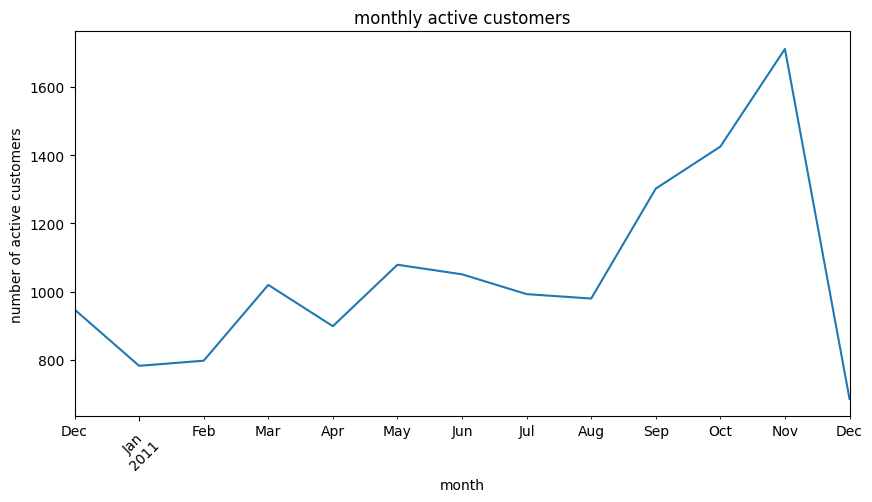

In [13]:
# Graph 2 - monthly revenue trend

df["YearMonth"] = df["InvoiceDate"].dt.to_period("M")

monthly_active = df.groupby("YearMonth")["CustomerID"].nunique()

plt.figure(figsize=(10,5))
monthly_active.plot()
plt.title("monthly active customers")
plt.xlabel("month")
plt.ylabel("number of active customers")
plt.xticks(rotation=45)
plt.show()

**Insight** - the number of active customers fluctuates over time, showing clear seasonal variation.
this indicates that customer engagement is not constant throughout the year, which is important when building clustering models, as customer behavior may depend on time related factors.

## 2. KMEANS (20 points)

In this exercise, you will implement K-means clustering on a comprehensive customer dataset, to identify distinct customer segments.

*   Load the data again.
*   Scale the data using minmax scaler (1 points).
*   Encode categorical variables (3 points).
*   Apply k-Means algorithm on the 'MntMeatProducts' and 'MntWines' features using n_clusters=5
 (4 points).
*   Visualize the clusters (3 points).
*   Apply k-Means algorithm on all features and find the best k using 2 methods (5 points).
*   Visualize the methods (4 points).










In [16]:
# download the marketing/customer personality dataset (contains MntWines, MntMeatProducts)
!kaggle datasets download -d imakash3011/customer-personality-analysis -p /content --force
!unzip -o /content/customer-personality-analysis.zip -d /content

Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
License(s): CC0-1.0
  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 248MB/s]
Archive:  /content/customer-personality-analysis.zip
  inflating: /content/marketing_campaign.csv  


In [17]:
import os
os.listdir("/content")

['.config',
 'customer-personality-analysis.zip',
 'customer-segmentation-dataset.zip',
 'marketing_campaign.csv',
 'Online Retail.xlsx',
 'sample_data']

In [18]:
# load the data

df = pd.read_csv("/content/marketing_campaign.csv", sep=";")
df.head()

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


In [ ]:
# Scale the data using MinMaxScaler

# Encode categorical variables


In [ ]:
# Apply k-Means on the 'MntWines' and 'MntMeatProducts' features with n_clusters=5

# Visualize the clusters


### Elbow

### Silhouette Score

## 3. PCA (8 points)
In this exercise, you will use PCA:
*   With n_components = 2 (3 points).
*   Visualize the PCA (2 points).
*   Find the variance explined in this PCA (3 points).





In [ ]:
# Adjust n_components as needed


# Create a DataFrame with the principal components



# Plotting the PCA


# Display explained variance


**Q**: What is the variance explained in the 2 component PCA?

**A**:

## 4. PCA & Kmeans (11 points)
This time, we will use the PCA computed output for the kmeans model.
*   Run PCA with n_components = 2 (1 points)
*   Find the best k for kmeans (4 points)
*   Plot the best clusters (3 points)
*   Answer the question (What question?) (3 points)





### Elbow

### Silhouette

**Q**: In our human eye, it's looks like we need 5 clusters. But both methods return 2. Why do you think kmeans returning 2 and not 5?

**A**:

**Questions**:
1.   How did the points group together in the final iteration?
2.   Was choosing different initial cluster centers leading to different final clusters? Why might this happen?
3.   Think of any real-world scenarios where K-means clustering could be useful?






**Answers**:



## 5. Find 3 datasets online (from kaggle, UCI, etc.) with more than 10 features and include labels - add links to datasets. (37 points)

a. Use PCA and TSNE (two different methods) with 2 components each and show the data with their labels (for each of the 3 data sets). 10 points

b. Use 3 different clustering methods for each dataset and show plots. Explain which had best results when comparing to labels and why. 12 points

c. Explain some of the differences between PCA and TSNE, while addressing the addition of data to the dataset in each. 8 points

d. Run datasets with LDA and show plot, how did this method effect results and why? 7 points
